# Beyond LDI
* The basis of LDI is a seperation of concerns by just concentrating on performance in the case of the PSP and for the hedging ability in terms of the LHP
* However with two equals portfolios that both have PSP and LHP building blocks, we might analyse the hedging benefits of the PSP or performance of the LHP; this is taking a step further from LDI and is formalised in the fund interaction theorem.
    * Distinct goals, but substantial value can be added by aligning PSP and LHP (unless associated with an excessive opportunity cost)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from my_modules import risk
from my_modules import portfolio
from my_modules import model

import numpy as np
import pandas as pd

## Naive Risk Budgeting Strategies between the PSP and GHP
* Not solving the problem of meeting liabilities in the best way. Will be improved in the dynamic risk budgeting.

#### How to write allocators or how to write strategies and how to backtest strategies that construct portfolios that mix the PSP and GHP in some sort of systematic way

In [5]:
# Using keyword arguments
def bt_mix(r1, r2, allocator, **kwargs):
    """
    Runs a back test on two sets of returns (r1 and r2) that have an equal shape. 
    Produces an  allocation of the first portfolio as a T * 1 DataFrame.
    Returns a T * N DataFrame of the resulting N portfolio scenarios.
    """
    if not r1.shape == r2.shape:
        raise ValueError("r1 and r2 need to be the same shape")
        
    weights = allocator(r1,r2,**kwargs)
    if not weights.shape == r1.shape:
        raise ValueError("Allocator did not returns weights that match r1")
    
    r_mix = weights*r1 + (1-weights)*r2
    return r_mix
    
def fixedmix_allocator(r1,r2,w1, **kwargs):
    return pd.DataFrame(data=w1, index=r1.index, columns=r1.columns)

In [23]:
rates, zc_prices = model.cir(10, 500, b=0.03, r_0=0.03)

price_10 = portfolio.bond_price(10, 100, 0.05, 12, rates)
price_30 = portfolio.bond_price(30, 100, 0.05, 12, rates)
rets_10 = portfolio.bond_total_return(price_10, 100, 0.05, 12)
rets_30 = portfolio.bond_total_return(price_30, 100, 0.05, 12)

rets_bonds = bt_mix(rets_10, rets_30, allocator=fixedmix_allocator, w1=.6)

mean_rets_bonds = rets_bonds.mean(axis='columns')
portfolio.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualised Return,Annulised Volatility,Max Drawdown,Skew,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Annualised Sharpe Ration
0,0.035731,0.003277,0.0,0.056605,3.277901,-0.001401,-0.000943,1.702097


In [26]:
price_eq = model.gbm(n_years=10,n_scenarios=500,mu=.07,sigma=.15)
rets_eq = price_eq.pct_change().dropna()
rets_eq = price_eq.pct_change().dropna()
rets_zc = zc_prices.pct_change().dropna()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
1,-0.006390,-0.056374,-0.016503,0.049206,0.039732,-0.033266,0.084368,-0.032809,-0.003719,-0.018853,...,0.035771,0.002991,0.102425,-0.026711,-0.020397,0.048972,-0.035651,-0.022424,-0.014933,0.017326
2,0.046262,0.007043,-0.075250,-0.054571,0.045383,0.013536,-0.046213,-0.057549,-0.045048,0.042594,...,-0.008022,-0.015597,0.014374,-0.033782,0.016786,0.072884,0.066144,-0.023432,0.098133,0.024245
3,-0.002199,0.001081,-0.059358,-0.004479,0.019681,-0.072397,0.041155,-0.006810,-0.046789,-0.021181,...,0.035898,0.019305,0.020436,0.026117,0.027123,-0.030521,0.050489,-0.018634,0.065373,0.004708
4,-0.000679,0.019533,0.055306,-0.003749,-0.045848,-0.062842,-0.006280,-0.069962,0.070369,0.047358,...,0.032101,0.018992,0.023263,0.032876,0.000410,-0.096217,-0.016972,0.017461,0.016971,-0.001788
5,0.013643,-0.029172,-0.007023,-0.043812,0.010145,0.009686,-0.029141,0.026438,-0.035747,-0.038486,...,-0.027094,0.003464,0.039278,0.028651,0.034566,0.061082,-0.032441,0.094972,-0.096592,0.023351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.019357,0.039416,-0.005147,-0.032512,0.051675,-0.057810,-0.007547,-0.074589,-0.025783,0.031288,...,-0.063963,0.059833,-0.023496,0.038586,-0.016908,-0.017838,-0.059591,-0.026044,0.023950,0.005060
117,0.046251,0.009798,-0.017061,-0.010884,-0.013331,0.030497,-0.033786,0.030816,0.017261,-0.008702,...,0.020207,0.008558,0.049086,0.043306,0.027598,0.026841,0.042789,-0.023479,-0.019484,0.020108
118,0.034246,0.000354,0.044460,0.011597,0.024542,0.004500,0.042867,-0.002418,0.012903,-0.037359,...,0.005171,0.055815,0.012821,0.035795,0.078660,0.022450,0.034361,-0.017656,0.001701,0.036131
119,0.007423,-0.015417,0.021909,0.103077,0.034280,-0.061007,-0.025676,0.018597,0.003092,-0.017869,...,-0.002230,-0.046188,-0.062521,-0.003784,0.002834,0.001311,-0.049772,-0.078929,-0.068023,-0.011327


In [27]:
rets_7030 = bt_mix(rets_eq, rets_bonds, allocator=fixedmix_allocator, w1=.7)
rets_7030_mean = rets_7030.mean(axis=1)
portfolio.summary_stats(pd.DataFrame(rets_7030_mean))

,Annualised Return,Annulised Volatility,Max Drawdown,Skew,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Annualised Sharpe Ration
0,0.059538,0.004845,0.0,0.166648,2.493817,-0.002593,-0.002231,5.933214


In [28]:
summaries = portfolio.summary_stats(rets_7030)
summaries.head()

,Annualised Return,Annulised Volatility,Max Drawdown,Skew,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Annualised Sharpe Ration
0,0.003773,0.102291,-0.249629,-0.038179,2.876649,0.048013,0.061877,-0.249657
1,0.020124,0.121878,-0.310153,-0.246353,3.532692,0.057388,0.075762,-0.079012
2,0.044311,0.111373,-0.292493,-0.308332,3.142611,0.051185,0.069670,0.124925
3,0.039766,0.110020,-0.163926,0.344938,2.854721,0.045193,0.051394,0.086262
4,0.096323,0.107298,-0.192969,0.345169,3.548284,0.039137,0.046862,0.601505


In [29]:
summaries.tail()

,Annualised Return,Annulised Volatility,Max Drawdown,Skew,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Annualised Sharpe Ration
495,0.011106,0.107831,-0.402906,0.052912,2.679799,0.049319,0.060154,-0.170664
496,0.061279,0.099882,-0.148678,-0.125454,2.745300,0.043012,0.055596,0.304674
497,-0.003635,0.108810,-0.353651,0.375079,2.726931,0.048023,0.053823,-0.300973
498,0.068643,0.105892,-0.197205,0.141903,2.659926,0.043033,0.052183,0.355059
499,0.045930,0.099794,-0.131626,-0.584800,3.515424,0.047309,0.068522,0.155238


In [30]:
pd.concat([
    portfolio.terminal_stats(rets_bonds, name='FI'),
    portfolio.terminal_stats(rets_eq, name='EQ'),
    portfolio.terminal_stats(rets_7030, name='70-30')
], axis=1)

,FI,EQ,70-30
mean,1.381891,2.000763,1.794493
std,0.112168,1.088910,0.662193
p_breach,NaN,0.062000,0.012000
e_short,NaN,0.112655,0.077663
p_reach,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN


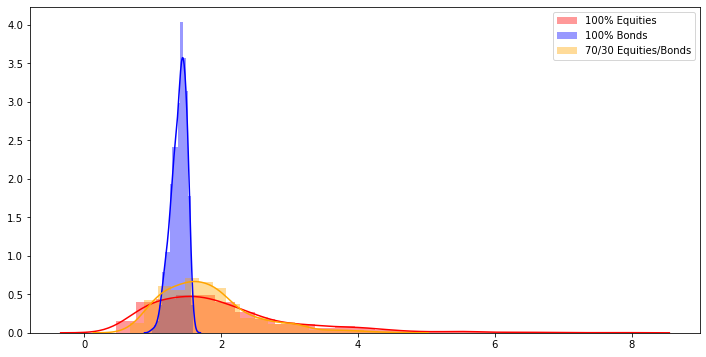

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.distplot(portfolio.terminal_values(rets_eq), color="red", label="100% Equities")
sns.distplot(portfolio.terminal_values(rets_bonds), color="blue", label="100% Bonds")
sns.distplot(portfolio.terminal_values(rets_7030), color="orange", label="70/30 Equities/Bonds")
plt.legend();

There is a significant portion of the 100% equities that are below one. The 7030 is also not ideal. 
We can have a varying allocation in order to meet our liability goals; starting with a high equity allocation and then shifting this to bonds towards the end.

## Glide paths for allocation

In [33]:
def glidepath_allocator(r1, r2, start_glide=1, end_glide=0):
    """
    Simulates a target-date fund-stype gradual move from r1 to r2.
    """
    n_points = r1.shape[0]
    n_col = r1.shape[1]
    path = pd.Series(data=np.linspace(start_glide, end_glide, num=n_points))
    # Want to replicate the amound of rows in the data frame
    paths = pd.concat([path]*n_col, axis=1)
    paths.index = r1.index
    paths.columns = r1.columns
    return paths

In [34]:
rets_glide8020 = bt_mix(rets_eq, rets_bonds, glidepath_allocator, start_glide=.8, end_glide=.2)
pd.concat([
    portfolio.terminal_stats(rets_bonds, name='FI'),
    portfolio.terminal_stats(rets_eq, name='Equities'),
    portfolio.terminal_stats(rets_7030, name='70/30'),
    portfolio.terminal_stats(rets_glide8020, name='Glide 80 to 20')
], axis=1)

,FI,Equities,70/30,Glide 80 to 20
mean,1.381891,2.000763,1.794493,1.673369
std,0.112168,1.088910,0.662193,0.461246
p_breach,NaN,0.062000,0.012000,NaN
e_short,NaN,0.112655,0.077663,NaN
p_reach,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN


In [35]:
 # Glide paths rarely produces superior results